In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn statsmodels

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("/content/sample_data/train.csv")  # Replace with your file path
test_data = pd.read_csv("/content/sample_data/test.csv")    # Replace with your file path

In [7]:
train_data.head()
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


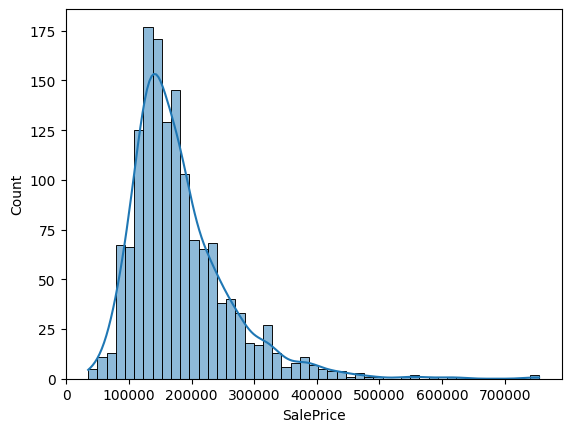

In [8]:
sns.histplot(train_data['SalePrice'], kde=True)
plt.show()

In [10]:
# For numerical columns
for col in train_data.select_dtypes(include=np.number).columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())

# For categorical columns
for col in train_data.select_dtypes(include='object').columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [11]:
train_data = pd.get_dummies(train_data)

In [12]:
# Example: Total square footage
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ... (Your previous code for data loading, cleaning, and feature engineering) ...

# Convert all columns to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaN values after conversion (if any)
X = X.fillna(X.mean())  # or X.median(), depending on your preference

# Explicitly convert all columns to float
# This ensures all columns are numeric, addressing the error.
X = X.astype(float)

X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     69.01
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        03:59:33   Log-Likelihood:                -16581.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1217   BIC:                         3.493e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -631.24

In [17]:
import statsmodels.formula.api as smf

# Get a list of dummy columns related to Neighborhood
neighborhood_cols = [col for col in train_data.columns if col.startswith('Neighborhood_')]

# Construct the formula using the dummy columns
formula = 'SalePrice ~ ' + ' + '.join(neighborhood_cols)

model_anova = smf.ols(formula, data=train_data).fit()
anova_table = sm.stats.anova_lm(model_anova)
print(anova_table)

                          df        sum_sq       mean_sq           F  \
Neighborhood_Blmngtn     1.0  3.347066e+09  3.347066e+09    1.147870   
Neighborhood_Blueste     1.0  3.747505e+09  3.747505e+09    1.285200   
Neighborhood_BrDale      1.0  9.425005e+10  9.425005e+10   32.322886   
Neighborhood_BrkSide     1.0  1.953347e+11  1.953347e+11   66.989695   
Neighborhood_ClearCr     1.0  2.318590e+10  2.318590e+10    7.951565   
Neighborhood_CollgCr     1.0  3.539785e+10  3.539785e+10   12.139631   
Neighborhood_Crawfor     1.0  4.469273e+10  4.469273e+10   15.327293   
Neighborhood_Edwards     1.0  2.981185e+11  2.981185e+11  102.239216   
Neighborhood_Gilbert     1.0  4.764992e+09  4.764992e+09    1.634145   
Neighborhood_IDOTRR      1.0  2.757729e+11  2.757729e+11   94.575827   
Neighborhood_MeadowV     1.0  1.390274e+11  1.390274e+11   47.679203   
Neighborhood_Mitchel     1.0  5.843179e+10  5.843179e+10   20.039077   
Neighborhood_NAmes       1.0  6.439032e+11  6.439032e+11  220.82

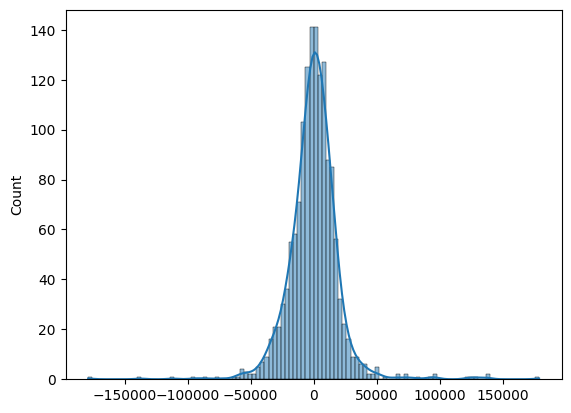

In [18]:
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

In [21]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")

evaluate_model(y_val, y_pred_lr, "Linear Regression")
evaluate_model(y_val, y_pred_rf, "Random Forest")
evaluate_model(y_val, y_pred_gb, "Gradient Boosting")

Linear Regression - RMSE: 29558.55, MAE: 18262.22, R-squared: 0.89
Random Forest - RMSE: 29874.96, MAE: 17922.48, R-squared: 0.88
Gradient Boosting - RMSE: 28337.70, MAE: 16630.54, R-squared: 0.90


In [27]:
neighborhood_columns = [col for col in train_data.columns if col.startswith('Neighborhood_')]
print(neighborhood_columns)

['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']


In [28]:
collgcr_avg_price = train_data[train_data['Neighborhood_CollgCr'] == 1]['SalePrice'].mean()
print(f"Average SalePrice in CollgCr: {collgcr_avg_price}")

Average SalePrice in CollgCr: 197965.77333333335


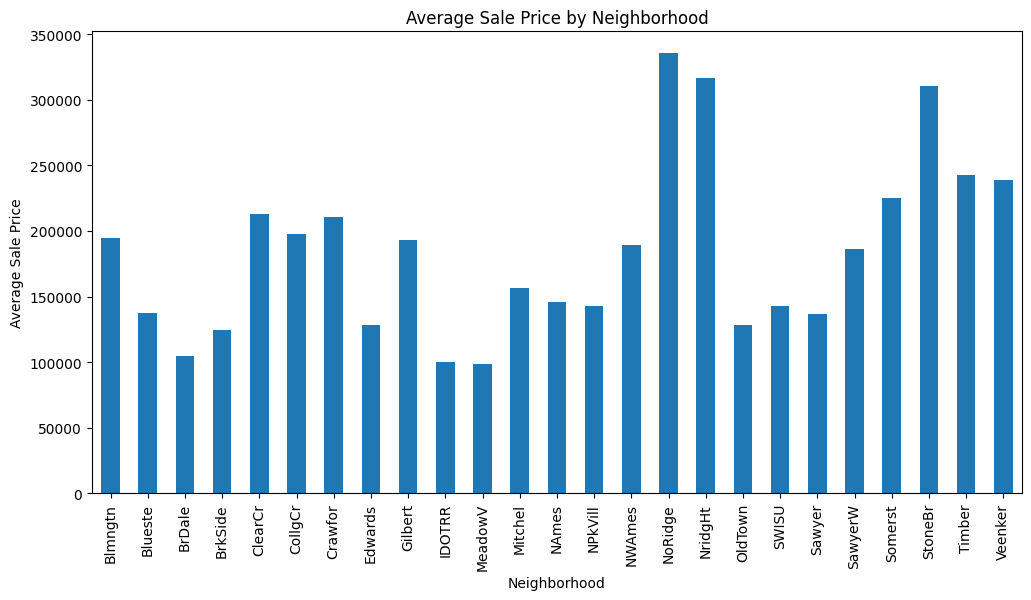

In [29]:
# Calculate average sale prices by original neighborhood before one-hot encoding
# Assuming you have a copy of the original DataFrame before one-hot encoding
original_train_data = pd.read_csv("/content/sample_data/train.csv") # Assuming you kept a copy
location_prices = original_train_data.groupby('Neighborhood')['SalePrice'].mean()

# Now you can plot the data
location_prices.plot(kind='bar', figsize=(12, 6))
plt.title("Average Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.show()